## Recommender System Notebook ##

The two most common types of recommender systems are Content-Based and Collaborative Filtering(CF)
> Collaborative filtering produces recommendations based on knowledge of user's attitude to items. Two sub categories:

    > Memory based
    > Model based

> Content based systems focus on the attributes of the items.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import tensorflow as tf
import seaborn as sns
%matplotlib inline
import re
!pip install nltk
import nltk
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from nltk.stem import PorterStemmer
ps = PorterStemmer()
from nltk.corpus import stopwords
from googletrans import Translator
trans = Translator() #Translator instance

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\meetd\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
country_list = ["AU", "BR", "CA", "FR", "DE", "IN", "IT", "MX", "RU", "GB", "US"]
data = pd.DataFrame() #Convert to pandas dataframe
column_names = ['Publish-Time','Title','Description','Video-URL','Thumbnail',
                'Channel-Name','Localized-Title','Localized-Description',
                'Upload-Status','Privacy','License','Embeddable-Status',
                'Public-Stats','Made-For-Kids','View-Count','Likes','Dislikes',
                'Embed-HTML'] #Reading specific columns
for country in country_list:
    temp_data = pd.read_csv('C:/Users/meetd/OneDrive/Desktop/Tech-Mahindra-ML/dataset/Cleaned_Data/'+country+'_data.csv',
                      names=column_names)
    temp_data = temp_data.drop(0)
    temp_data['Country'] = country #Change country and append data
    data = data.append(temp_data)

In [3]:
data.head()

,Publish-Time,Title,Description,Video-URL,Thumbnail,Channel-Name,Localized-Title,Localized-Description,Upload-Status,Privacy,License,Embeddable-Status,Public-Stats,Made-For-Kids,View-Count,Likes,Dislikes,Embed-HTML,Country
1,2021-07-21T18:00:06Z,I FILLED MY ISLAND HOUSE WITH PACKING PEANUTS!,CHECK OUT CHASECRAFT on iOS :: https://apps.ap...,https://i.ytimg.com/vi/Y3sj_v62dpc/default.jpg,https://i.ytimg.com/vi/Y3sj_v62dpc/mqdefault.jpg,Unspeakable,I FILLED MY ISLAND HOUSE WITH PACKING PEANUTS!,CHECK OUT CHASECRAFT on iOS :: https://apps.ap...,processed,public,youtube,True,False,False,3945994,101089,3084,"<iframe width=""480"" height=""270"" src=""//www.yo...",AU
2,2021-07-21T21:41:14Z,"Best Sand Art Wins $5,000 Challenge! | ZHC Crafts",I can't believe we made art out of sand\nSubsc...,https://i.ytimg.com/vi/aVxHSHzm4kE/default.jpg,https://i.ytimg.com/vi/aVxHSHzm4kE/mqdefault.jpg,ZHC Crafts,"Best Sand Art Wins $5,000 Challenge! | ZHC Crafts",I can't believe we made art out of sand\nSubsc...,processed,public,youtube,True,True,False,2204582,89100,1375,"<iframe width=""480"" height=""270"" src=""//www.yo...",AU
3,2021-07-22T13:00:04Z,Dune | Official Main Trailer,IT’S TIME. #DuneMovie coming October 22.\n\n--...,https://i.ytimg.com/vi/8g18jFHCLXk/default.jpg,https://i.ytimg.com/vi/8g18jFHCLXk/mqdefault.jpg,Warner Bros. Pictures,Dune | Official Main Trailer,IT’S TIME. #DuneMovie coming October 22.\n\n--...,processed,public,youtube,True,False,False,3725450,145277,2302,"<iframe width=""480"" height=""270"" src=""//www.yo...",AU
4,2021-07-22T17:44:43Z,Battlefield 2042 | Battlefield Portal Official...,"Play Battlefield™ 2042 starting October 22, 20...",https://i.ytimg.com/vi/q4qWMcQfOCc/default.jpg,https://i.ytimg.com/vi/q4qWMcQfOCc/mqdefault.jpg,Battlefield,Battlefield 2042 | Battlefield Portal Official...,"Play Battlefield™ 2042 starting October 22, 20...",processed,public,youtube,True,False,False,1443476,154428,1905,"<iframe width=""480"" height=""270"" src=""//www.yo...",AU
5,2021-07-21T05:30:14Z,2nd ODI Highlights | Sri Lanka vs India 2021,2nd ODI Highlights | Sri Lanka vs India 2021\n...,https://i.ytimg.com/vi/8J7BoMdU-qw/default.jpg,https://i.ytimg.com/vi/8J7BoMdU-qw/mqdefault.jpg,Sri Lanka Cricket,2nd ODI Highlights | Sri Lanka vs India 2021,2nd ODI Highlights | Sri Lanka vs India 2021\n...,processed,public,youtube,True,True,False,12056482,296859,9993,"<iframe width=""480"" height=""270"" src=""//www.yo...",AU


In [4]:
data = data.drop(['Publish-Time','Video-URL','Thumbnail','Localized-Title','Localized-Description',
                'Upload-Status','Privacy','License','Embeddable-Status',
                'Public-Stats','Made-For-Kids','Embed-HTML'] , axis=1)
data.head()

,Title,Description,Channel-Name,View-Count,Likes,Dislikes,Country
1,I FILLED MY ISLAND HOUSE WITH PACKING PEANUTS!,CHECK OUT CHASECRAFT on iOS :: https://apps.ap...,Unspeakable,3945994,101089,3084,AU
2,"Best Sand Art Wins $5,000 Challenge! | ZHC Crafts",I can't believe we made art out of sand\nSubsc...,ZHC Crafts,2204582,89100,1375,AU
3,Dune | Official Main Trailer,IT’S TIME. #DuneMovie coming October 22.\n\n--...,Warner Bros. Pictures,3725450,145277,2302,AU
4,Battlefield 2042 | Battlefield Portal Official...,"Play Battlefield™ 2042 starting October 22, 20...",Battlefield,1443476,154428,1905,AU
5,2nd ODI Highlights | Sri Lanka vs India 2021,2nd ODI Highlights | Sri Lanka vs India 2021\n...,Sri Lanka Cricket,12056482,296859,9993,AU


## Multinomial Naive Bayes

In [5]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import naive_bayes
from sklearn.metrics import roc_auc_score,accuracy_score
import pickle

In [14]:
stop_words = set(stopwords.words('english')) #Declaring stopwords
vectorizer = TfidfVectorizer(use_idf = True, lowercase=True, strip_accents='ascii', stop_words=stop_words)
#Transform text into a meaningful representation of numbers

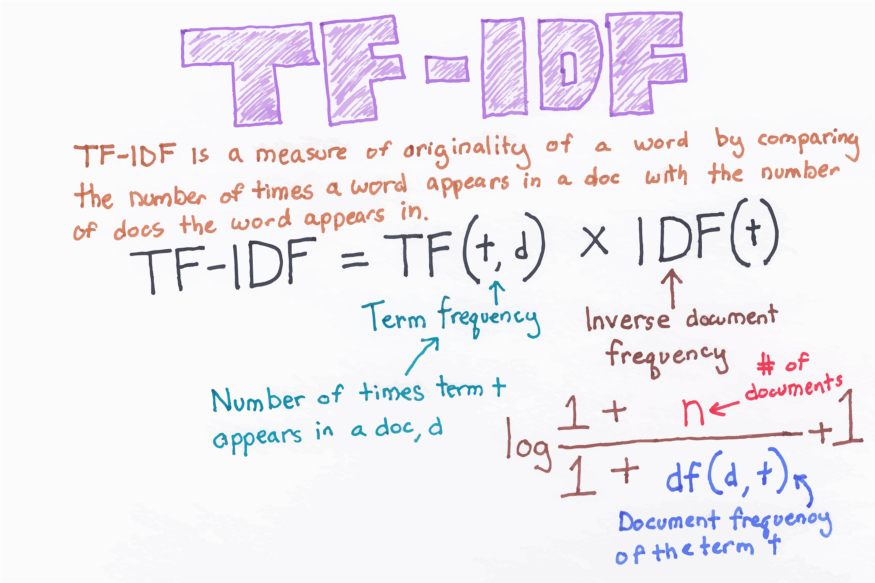

In [7]:
X_find = vectorizer.fit_transform(data['Title'])
Y_find = data['View-Count']

In [8]:
pickle.dump(vectorizer,open('transform.pkl','wb'))

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X_find, Y_find, test_size=0.1, random_state=42)

The parameter ${\theta}_{yi}$ is estimated by a smoothed version of maximum likelihood $\hat{\theta}_{yi} = \frac{ N_{yi} + \alpha}{N_y + \alpha n}$ 
where $N_{yi} = \sum_{x \in T} x_i$ is the number of times feature $i$ appears in a smaple of class $y$ in the training set $T$, and $N_{yi}$ is the total count of all features for class y

In [64]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.utils.extmath import safe_sparse_dot
from sklearn.utils.validation import check_is_fitted
from sklearn.utils import check_array
import warnings
class MultinomialNB():
    def __init__(self, *, alpha=1.0, fit_prior=True, class_prior=None):
        self.alpha = alpha
        self.fit_prior = fit_prior
        self.class_prior = class_prior

    def _more_tags(self):
        return {'requires_positive_X': True}

    def _count(self, X, Y):
        #Count and smooth feature occurrences.
        self.feature_count_ += safe_sparse_dot(Y.T, X)
        self.class_count_ += Y.sum(axis=0)

    def _update_feature_log_prob(self, alpha):
        #Apply smoothing to raw counts and recompute log probabilities
        smoothed_fc = self.feature_count_ + alpha
        smoothed_cc = smoothed_fc.sum(axis=1)

        self.feature_log_prob_ = (np.log(smoothed_fc) -
                                  np.log(smoothed_cc.reshape(-1, 1)))
    def _update_class_log_prior(self, class_prior=None):
        n_classes = len(self.classes_)
        if class_prior is not None:
            if len(class_prior) != n_classes:
                raise ValueError("Number of priors must match number of"
                                 " classes.")
            self.class_log_prior_ = np.log(class_prior)
        elif self.fit_prior:
            with warnings.catch_warnings():
                # silence the warning when count is 0 because class was not yet
                # observed
                warnings.simplefilter("ignore", RuntimeWarning)
                log_class_count = np.log(self.class_count_)
            # empirical prior, with sample_weight taken into account
            self.class_log_prior_ = (log_class_count -
                                     np.log(self.class_count_.sum()))
        else:
            self.class_log_prior_ = np.full(n_classes, -np.log(n_classes))
    def _joint_log_likelihood(self, X):
        #Calculate the posterior log probability of the samples X#
        return (safe_sparse_dot(X, self.feature_log_prob_.T) +
                self.class_log_prior_)
    def _init_counters(self, n_effective_classes, n_features):
        self.class_count_ = np.zeros(n_effective_classes, dtype=np.float64)
        self.feature_count_ = np.zeros((n_effective_classes, n_features),
                                       dtype=np.float64)
    def fit(self, X, y, sample_weight=None):
        _, n_features = X.shape
        self.n_features_ = n_features
        labelbin = LabelBinarizer()
        Y = labelbin.fit_transform(y)
        self.classes_ = labelbin.classes_
        if Y.shape[1] == 1:
            Y = np.concatenate((1 - Y, Y), axis=1)
        if sample_weight is not None:
            Y = Y.astype(np.float64, copy=False)
            sample_weight = _check_sample_weight(sample_weight, X)
            sample_weight = np.atleast_2d(sample_weight)
            Y *= sample_weight.T
        class_prior = self.class_prior
        n_effective_classes = Y.shape[1]
        self._init_counters(n_effective_classes, n_features)
        self._count(X, Y)
        #alpha = self._check_alpha()
        alpha = self.alpha
        self._update_feature_log_prob(alpha)
        self._update_class_log_prior(class_prior=class_prior)
        return self
    def _check_X(self, X):
        return check_array(X, accept_sparse='csr')
    def predict(self, X):
        check_is_fitted(self)
        X = self._check_X(X)
        jll = self._joint_log_likelihood(X)
        return self.classes_[np.argmax(jll, axis=1)]

In [65]:
clf = MultinomialNB()
clf.fit(X_train,Y_train)

In [66]:
print(X_train,X_test,Y_train,Y_test)

  (0, 1866)	0.33667852809806487
  (0, 458)	0.1896492578500298
  (0, 392)	0.33667852809806487
  (0, 651)	0.33667852809806487
  (0, 98)	0.3160530709078878
  (0, 123)	0.33667852809806487
  (0, 1125)	0.3160530709078878
  (0, 389)	0.29006806794723783
  (0, 580)	0.33667852809806487
  (0, 667)	0.33667852809806487
  (1, 1664)	0.3652039533510452
  (1, 897)	0.3652039533510452
  (1, 1688)	0.3652039533510452
  (1, 840)	0.3652039533510452
  (1, 1608)	0.31540024720183124
  (1, 1734)	0.3652039533510452
  (1, 1941)	0.34829415802329844
  (1, 104)	0.33517790177113904
  (2, 1513)	0.29367478039052897
  (2, 1528)	0.29367478039052897
  (2, 541)	0.29367478039052897
  (2, 51)	0.29367478039052897
  (2, 1014)	0.29367478039052897
  (2, 466)	0.29367478039052897
  (2, 58)	0.29367478039052897
  :	:
  (489, 945)	0.46140775021652475
  (489, 1695)	0.47466318118548023
  (489, 1792)	0.33344786897019624
  (490, 132)	0.47155714295074797
  (490, 1338)	0.47155714295074797
  (490, 531)	0.42217221032597585
  (490, 1872)	0.471

In [67]:
accuracy_score(Y_test,clf.predict(X_test))*100

21.818181818181817

In [68]:
filename = 'nlp_model.pkl'
pickle.dump(clf,open(filename,'wb'))